# IMPORTATION DES PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn. svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

## Lecture du fichier

In [2]:
data = pd.read_csv('../data/LoanApprovalPrediction.csv')

In [3]:
data.head()

Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

## Analyse des données et prétraitement des données

In [4]:
data.shape

(598, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data['Loan_Status'].value_counts()

Loan_Status
Y    411
N    187
Name: count, dtype: int64

In [8]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

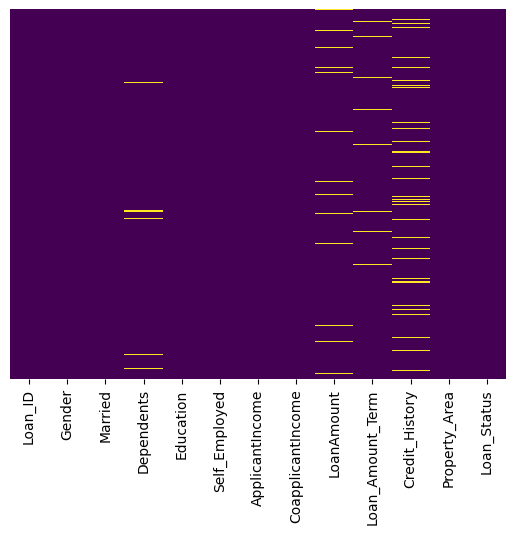

In [9]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
colonnes_vide = ['Dependents',
                 'LoanAmount',
                 'Loan_Amount_Term',
                 'Credit_History'
                ]

In [11]:
for col in colonnes_vide:
    data[col].fillna(data[col].mean(), inplace=True) 

In [12]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         598 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     598 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [14]:
label_encoder = LabelEncoder()
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])

In [15]:
type_object = ['Loan_ID',
               'Gender',
               'Married',
               'Education',
               'Self_Employed',
               'Property_Area',
              ]
label_encoder = LabelEncoder()
for type in type_object:
    data[type] = label_encoder.fit_transform(data[type])

<Axes: >

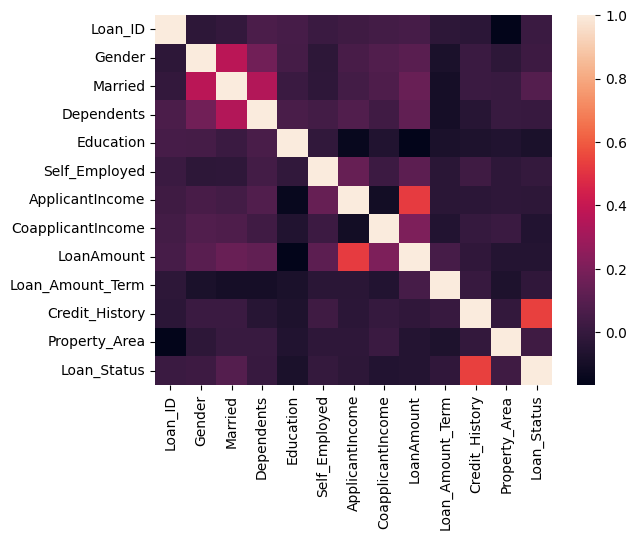

In [16]:
sns.heatmap(data.corr(), annot =False)

## Division des données

In [17]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [18]:
X.shape

(598, 12)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Entraitement du modèle et évaluation du modèle

In [20]:
model_list = [RandomForestClassifier(n_estimators=100, random_state=7),
              DecisionTreeClassifier(),
              SVC(),
              LogisticRegression()
             ]

In [21]:
for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model}\n")
    print("Precision_score =", precision_score(y_test, y_pred))
    print("Recall_score =", recall_score(y_test, y_pred))
    print("F1_score =", f1_score(y_test, y_pred))
    print(f"accuracy_score = {accuracy_score(y_test, y_pred)}\n")

RandomForestClassifier(random_state=7)

Precision_score = 0.8016528925619835
Recall_score = 0.9238095238095239
F1_score = 0.8584070796460177
accuracy_score = 0.7866666666666666

DecisionTreeClassifier()

Precision_score = 0.7706422018348624
Recall_score = 0.8
F1_score = 0.7850467289719626
accuracy_score = 0.6933333333333334

SVC()

Precision_score = 0.7
Recall_score = 1.0
F1_score = 0.8235294117647058
accuracy_score = 0.7

LogisticRegression()

Precision_score = 0.7857142857142857
Recall_score = 0.9428571428571428
F1_score = 0.8571428571428571
accuracy_score = 0.78



In [22]:
model_random = RandomForestClassifier()
model_random.fit(X_train, y_train)

RandomForestClassifier()

Text(0.5, 1.0, 'Matrice de confusion ')

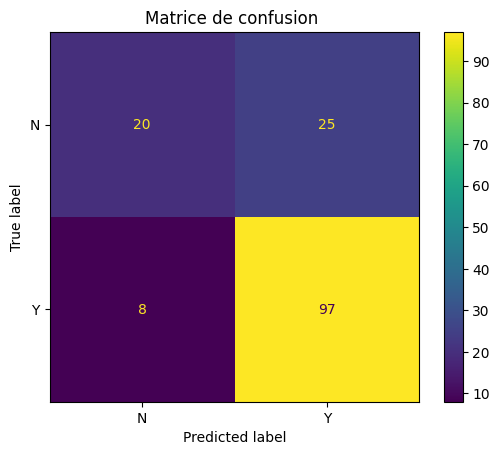

In [23]:
ConfusionMatrixDisplay.from_estimator(model_random, X_test, y_test, display_labels=['N', 'Y'])
plt.title('Matrice de confusion ')

Text(0.5, 1.0, 'Matrice de confusion ')

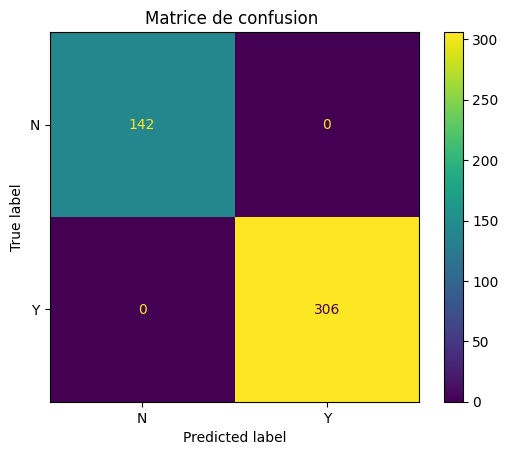

In [24]:
ConfusionMatrixDisplay.from_estimator(model_random, X_train, y_train, display_labels=['N', 'Y'])
plt.title('Matrice de confusion ')